<a href="https://colab.research.google.com/github/kitarp07/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train

((60000, 28, 28), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [ ]:
x_train = x_train.astype("float32")/ 255.0

x_test = x_test.astype("float32")/ 255.0

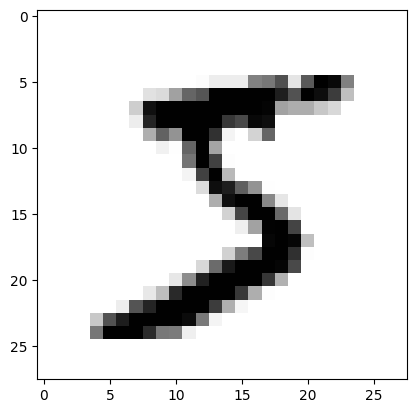

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)

Text(0.5, 1.0, '1')

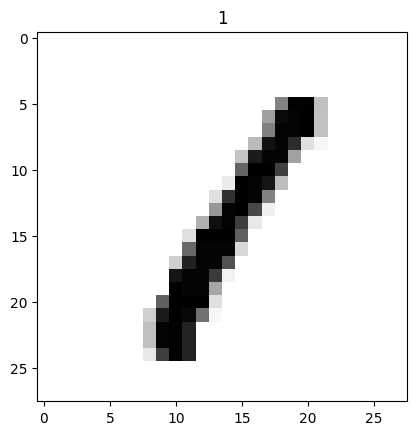

In [ ]:
index=3
plt.imshow(x_train[index], cmap = plt.cm.binary)
plt.title(y_train[index])

In [ ]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(
),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5684 - accuracy: 0.8333
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3006 - accuracy: 0.9154
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2636 - accuracy: 0.9254
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2439 - accuracy: 0.9305
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2314 - accuracy: 0.9352
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2224 - accuracy: 0.9360
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2147 - accuracy: 0.9378
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2093 - accuracy: 0.9392
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2031 - accuracy: 0.9413
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.199

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2096 - accuracy: 0.9415


[0.20961935818195343, 0.9415000081062317]

<Axes: >

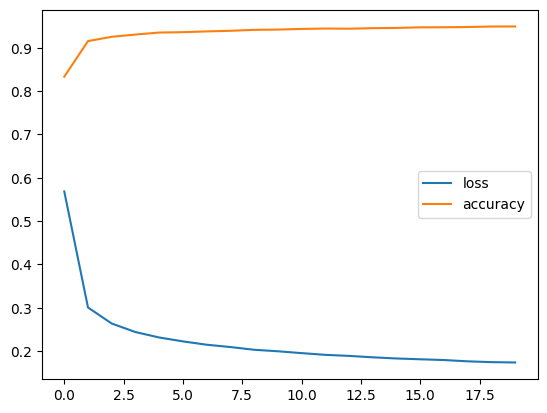

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
probs = model.predict(x_test)
probs[0], tf.argmax(probs[0])

313/313 [==============================] - 0s 1ms/step


(array([4.8978073e-08, 3.3442061e-06, 3.3747806e-04, 5.6168185e-05,
        1.8205346e-10, 2.3011202e-07, 1.5779109e-14, 9.9958128e-01,
        4.6582359e-06, 1.6731654e-05], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>)

In [ ]:
preds = tf.argmax(probs, axis=1)
preds[:4]

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([7, 2, 1, 0])>

In [ ]:
import random

def plot_random_image(model, images, true_labels):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = pred_probs.argmax()
  true_label = true_labels[i]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label==true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} (True:{})".format(pred_label, true_label), color=color)

1/1 [==============================] - 0s 22ms/step


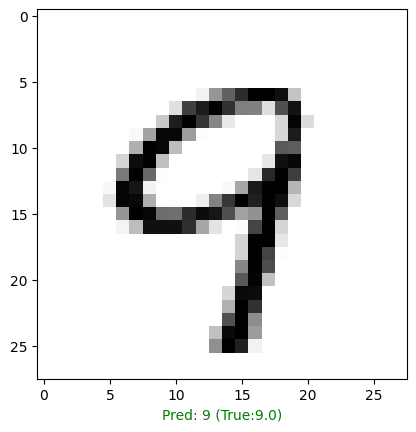

In [ ]:

plot_random_image(model=model, images=x_train, true_labels=y_train)